B2A:[[-1.  -0.   0.   0. ]
 [ 0.  -1.   0.   0. ]
 [ 0.   0.   1.  -0.5]
 [ 0.   0.   0.   1. ]]
A2B:[[-1.   0.  -0.  -0. ]
 [-0.  -1.  -0.  -0. ]
 [ 0.   0.   1.   0.5]
 [ 0.   0.   0.   1. ]]
p:[ 0.   0.  -0.5]
p_inv:[-0.  -0.   0.5]
R:[[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
R_inv:[[-1.  0. -0.]
 [-0. -1. -0.]
 [ 0.  0.  1.]]
B2A1:[[ 0.17 -0.65  0.74  1.  ]
 [ 0.98  0.17 -0.07  2.  ]
 [-0.07  0.74  0.67  3.  ]
 [ 0.    0.    0.    1.  ]]
A2B1:[[ 0.17  0.98 -0.07 -1.91]
 [-0.65  0.17  0.74 -1.91]
 [ 0.74 -0.07  0.67 -2.59]
 [ 0.    0.    0.    1.  ]]
p1:[1 2 3]
p1_inv:[-1 -2 -3]
R1:[[ 0.17 -0.65  0.74]
 [ 0.98  0.17 -0.07]
 [-0.07  0.74  0.67]]
R1_inv:[[ 0.17  0.98 -0.07]
 [-0.65  0.17  0.74]
 [ 0.74 -0.07  0.67]]
p1_1:[-1.91 -1.91 -2.59]


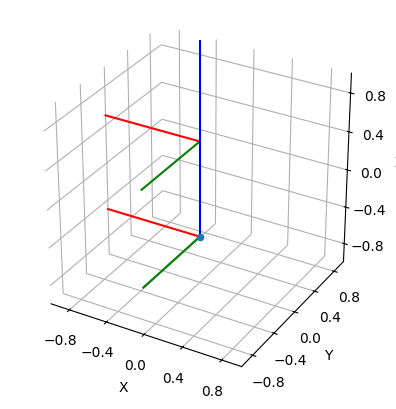

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import pytransform3d.rotations as pr
import pytransform3d.transformations as pt

p = np.array([0.0, 0.0, -0.5])
a = np.array([0.0, 0.0, 1.0, np.pi])  # R(z,pi)
R = pr.matrix_from_axis_angle(a)
p_inv = -p
R_inv = np.linalg.inv(R)
B2A = pt.transform_from(R, p)
A2B = pt.invert_transform(B2A)

print(f"B2A:{np.round(B2A, 2)}")
print(f"A2B:{np.round(A2B, 2)}")
print(f"p:{np.round(p, 2)}")
print(f"p_inv:{np.round(p_inv, 2)}")
print(f"R:{np.round(R, 2)}")
print(f"R_inv:{np.round(R_inv, 2)}")

p1 = np.array([1, 2, 3])
a1 = np.array([np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2), np.pi/2])  # R(z,pi)
R1 = pr.matrix_from_axis_angle(a1)
p1_inv = - p1
R1_inv = np.linalg.inv(R1)
p1_1 = - R1_inv@p1  # 分块矩阵求逆
B2A1 = pt.transform_from(R1, p1)
A2B1 = pt.invert_transform(B2A1)

print(f"B2A1:{np.round(B2A1, 2)}")
print(f"A2B1:{np.round(A2B1, 2)}")
print(f"p1:{np.round(p1, 2)}")
print(f"p1_inv:{np.round(p1_inv, 2)}")
print(f"R1:{np.round(R1, 2)}")
print(f"R1_inv:{np.round(R1_inv, 2)}")

print(f"p1_1:{np.round(p1_1, 2)}")

# p = np.array([0.3, 0.4, 0.5])
# a = np.array([0.0, 0.0, 1.0, -np.pi / 2.0])
# C2B = pt.transform_from(pr.matrix_from_axis_angle(a), p)
# print(np.round(C2B))
# 
# C2A = pt.concat(C2B, B2A)
# p = pt.transform(C2A, np.ones(4))
# print(np.round(C2A))

ax = pt.plot_transform(A2B=A2B)
pt.plot_transform(ax, A2B=B2A)
ax.scatter(p[0], p[1], p[2])
plt.show()